In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud
import seaborn as sns
from scipy import stats
import numpy as np

pd.options.mode.copy_on_write = True

In [57]:
# Load data
data = pd.read_csv('movies.csv',header=0)
data

,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,bayesian_average,genre_list,company_list,country_list,language_codes,actor_names,job_name_pairs
0,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,7.658,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['en'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","[['Director', 'John Lasseter'], ['Screenplay',..."
1,65000000,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,6.844,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['en', 'fr']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","[['Executive Producer', 'Larry J. Franco'], ['..."
2,0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,6.022,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],['en'],"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","[['Director', 'Howard Deutch'], ['Characters',..."
3,16000000,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,5.737,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],['en'],"['Whitney Houston', 'Angela Bassett', 'Loretta...","[['Director', 'Forest Whitaker'], ['Screenplay..."
4,0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,5.671,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['en'],"['Steve Martin', 'Diane Keaton', 'Martin Short...","[['Original Music Composer', 'Alan Silvestri']..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44892,0,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,NaN,0.0,90.0,Subdue,4.0,1.0,5.612,"['Drama', 'Family']",[],['Iran'],['fa'],"['Leila Hatami', 'Kourosh Tahami', 'Elham Korda']","[['Director', 'Hamid Nematollah'], ['Producer'..."
44893,0,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,5.715,['Drama'],['Sine Olivia'],['Philippines'],['tl'],"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio...","[['Director', 'Lav Diaz'], ['Writer', 'Lav Dia..."
44894,0,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Betrayal,3.8,6.0,5.533,"['Action', 'Drama', 'Thriller']",['American World Pictures'],['United States of America'],['en'],"['Erika Eleniak', 'Adam Baldwin', 'Julie du Pa...","[['Director', 'Mark L. Lester'], ['Screenplay'..."
44895,0,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Satan Triumphant,0.0,0.0,5.626,[],['Yermoliev'],['Russia'],[],"['Iwan Mosschuchin', 'Nathalie Lissenko', 'Pav...","[['Director', 'Yakov Protazanov'], ['Producer'..."


# Analysis of Actors, Directors, and Production Companies in successful movies

In the following section, the top actors, directors, and production companies will be discussed and analysed in terms of their movies' rating, revenue and popularity.
<br>Firstly, the necessary columns were copied to a new dataframe for analysis.

In [58]:
analysis = data[['budget','popularity','revenue','bayesian_average','release_date','genre_list','actor_names','job_name_pairs','company_list']]
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   budget            44897 non-null  int64  
 1   popularity        44897 non-null  float64
 2   revenue           44897 non-null  float64
 3   bayesian_average  44897 non-null  float64
 4   release_date      44823 non-null  object 
 5   genre_list        44897 non-null  object 
 6   actor_names       44897 non-null  object 
 7   job_name_pairs    44897 non-null  object 
 8   company_list      44897 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.1+ MB


In [59]:
# Format the date into datetime
analysis['release_date'] = pd.to_datetime(analysis['release_date'])
analysis['genre_list_lengths'] = analysis['genre_list'].apply(lambda x: len(ast.literal_eval(x)))
analysis.loc[:,'actor_names_lengths'] = analysis['actor_names'].apply(lambda x: len(ast.literal_eval(x)))
analysis['job_name_lengths'] = analysis['job_name_pairs'].apply(lambda x: len(ast.literal_eval(x)))
analysis.loc[:,'company_list_lengths'] = analysis['company_list'].apply(lambda x: len(ast.literal_eval(x)))
analysis = analysis[['budget','popularity','revenue','bayesian_average','release_date','genre_list_lengths', 'actor_names_lengths', 'job_name_lengths', 'company_list_lengths', 'genre_list','actor_names','job_name_pairs','company_list']]

for column in analysis.columns[:9]:
    min = analysis[column].min()
    max = analysis[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- budget -----
Range of values in 'budget': 0  -  380000000


----- popularity -----
Range of values in 'popularity': 0.0  -  547.488298


----- revenue -----
Range of values in 'revenue': 0.0  -  2787965087.0


----- bayesian_average -----
Range of values in 'bayesian_average': 3.417  -  8.6


----- release_date -----
Range of values in 'release_date': 1874-12-09 00:00:00  -  2017-12-27 00:00:00


----- genre_list_lengths -----
Range of values in 'genre_list_lengths': 0  -  8


----- actor_names_lengths -----
Range of values in 'actor_names_lengths': 0  -  313


----- job_name_lengths -----
Range of values in 'job_name_lengths': 0  -  435


----- company_list_lengths -----
Range of values in 'company_list_lengths': 0  -  26




From the above figures, we understand that some moives contain a list of 313 actors while some contain a blank list.
<br>Moreover, the range of movies is between 1874 and 2017. In our study, we would mainly focus on the recent movies.
<br>Therefore, those movies released before 2000 were filtered out.
<br><br>In addition, the actor_names were shorten to 3 actors as the lists were ordered according to their significance. In other words, only the first 3 leading actors would be studyed in the following section.
<br>Lastly, those movies with blank list of actors were dropped.

In [60]:
filtered_analysis = analysis.copy()
filtered_analysis = filtered_analysis[filtered_analysis['release_date'] >= pd.to_datetime('2000-01-01')]

In [61]:
genre = set()

for index, row in filtered_analysis.iterrows():
    list = ast.literal_eval(row['genre_list'])
    filtered_analysis.at[index,'genre_list'] = list
    for item in list:
        genre.add(item)

In [62]:
actors_analysis = filtered_analysis[['budget','popularity','revenue','bayesian_average','release_date','genre_list_lengths', 'actor_names_lengths', 'genre_list','actor_names']]
actors_analysis = actors_analysis[actors_analysis['actor_names'] != "[]"]
actors_analysis = actors_analysis.reset_index(drop=True)

for index, row in actors_analysis.iterrows():
    list = ast.literal_eval(row['actor_names'])
    if len(list) > 3:
        updated_list = list[:3]
        actors_analysis.at[index,'actor_names'] = updated_list
        actors_analysis.loc[index,'actor_names_lengths'] = len(updated_list)
    else:
        actors_analysis.at[index,'actor_names'] = list
        actors_analysis.loc[index,'actor_names_lengths'] = len(list)

actors_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22113 entries, 0 to 22112
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget               22113 non-null  int64         
 1   popularity           22113 non-null  float64       
 2   revenue              22113 non-null  float64       
 3   bayesian_average     22113 non-null  float64       
 4   release_date         22113 non-null  datetime64[ns]
 5   genre_list_lengths   22113 non-null  int64         
 6   actor_names_lengths  22113 non-null  int64         
 7   genre_list           22113 non-null  object        
 8   actor_names          22113 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.5+ MB


In [63]:
for column in actors_analysis.columns[:7]:
    min = actors_analysis[column].min()
    max = actors_analysis[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- budget -----
Range of values in 'budget': 0  -  380000000


----- popularity -----
Range of values in 'popularity': 0.001177  -  547.488298


----- revenue -----
Range of values in 'revenue': 0.0  -  2787965087.0


----- bayesian_average -----
Range of values in 'bayesian_average': 3.417  -  8.276


----- release_date -----
Range of values in 'release_date': 2000-01-01 00:00:00  -  2017-12-27 00:00:00


----- genre_list_lengths -----
Range of values in 'genre_list_lengths': 0  -  8


----- actor_names_lengths -----
Range of values in 'actor_names_lengths': 1  -  3




In [64]:
directors_analysis = filtered_analysis[['budget','popularity','revenue','bayesian_average','release_date','genre_list_lengths', 'job_name_lengths', 'genre_list','job_name_pairs']]

directors_analysis['directors'] = ""
directors_analysis['directors_lengths'] = 0

for index, row in directors_analysis.iterrows():
    list = ast.literal_eval(row['job_name_pairs'])
    directors_list = []
    for item in list:
        if item[0] == 'Director':
            directors_list.append(item[1])
    directors_list = directors_list[:3]
    directors_analysis.at[index, 'directors'] = directors_list
    directors_analysis.loc[index, 'directors_lengths'] = len(directors_list)
directors_analysis = directors_analysis[directors_analysis['directors_lengths'] != 0]
directors_analysis = directors_analysis.reset_index(drop=True)

directors_analysis = directors_analysis[['budget','popularity','revenue','bayesian_average','release_date','genre_list_lengths', 'directors_lengths', 'genre_list','directors']]
directors_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23057 entries, 0 to 23056
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   budget              23057 non-null  int64         
 1   popularity          23057 non-null  float64       
 2   revenue             23057 non-null  float64       
 3   bayesian_average    23057 non-null  float64       
 4   release_date        23057 non-null  datetime64[ns]
 5   genre_list_lengths  23057 non-null  int64         
 6   directors_lengths   23057 non-null  int64         
 7   genre_list          23057 non-null  object        
 8   directors           23057 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.6+ MB


In [65]:
for column in directors_analysis.columns[:7]:
    min = directors_analysis[column].min()
    max = directors_analysis[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- budget -----
Range of values in 'budget': 0  -  380000000


----- popularity -----
Range of values in 'popularity': 0.001177  -  547.488298


----- revenue -----
Range of values in 'revenue': 0.0  -  2787965087.0


----- bayesian_average -----
Range of values in 'bayesian_average': 3.417  -  8.276


----- release_date -----
Range of values in 'release_date': 2000-01-01 00:00:00  -  2017-12-27 00:00:00


----- genre_list_lengths -----
Range of values in 'genre_list_lengths': 0  -  8


----- directors_lengths -----
Range of values in 'directors_lengths': 1  -  3




After refining the dataset, the top 20th actors, directors with most movies can be studied.

## WordCloud of actor names

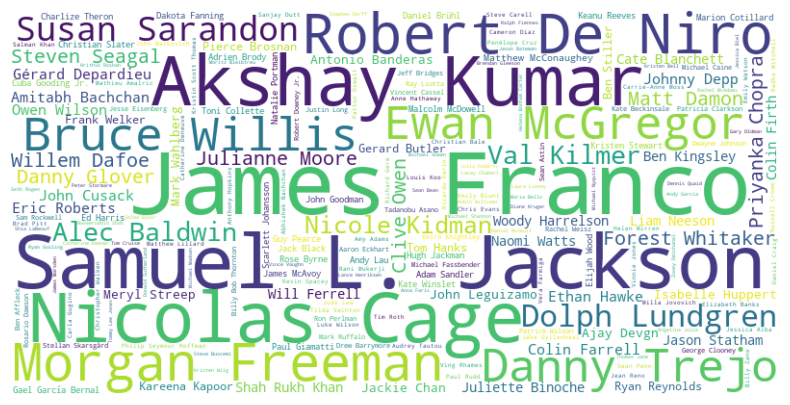

In [66]:
actors = []

for index, row in actors_analysis.iterrows():
    for name in row['actor_names']:
        actors.append(name)

# Count word frequencies
actor_counts = pd.Series(actors).value_counts()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(actor_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Bar Chart of Top 20th Actors

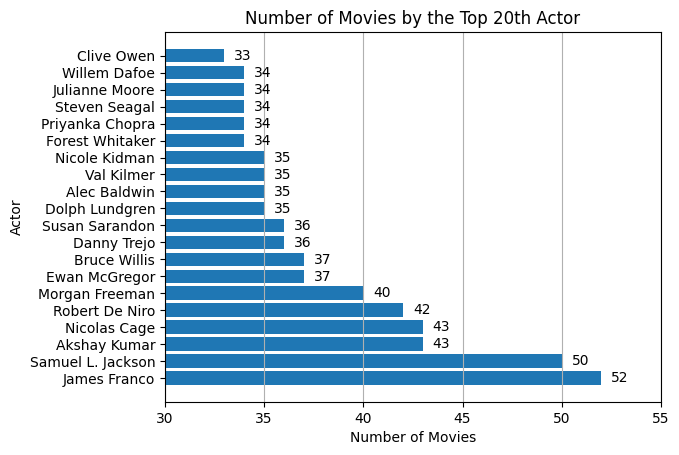

In [67]:
top_actors = actor_counts[:20].copy()
x = top_actors.index
y = top_actors.values

# Create the bar chart
plt.barh(x, y)

# Customize the chart
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Number of Movies by the Top 20th Actor')
plt.xlim(30, 55)
plt.grid(axis='x')
plt.xticks(range(30, 56, 5))

for i in range(len(x)):
    plt.text(y[i] + 0.5, i, str(y[i]), va='center')

# Display the chart
plt.show()

## WordCloud of director names

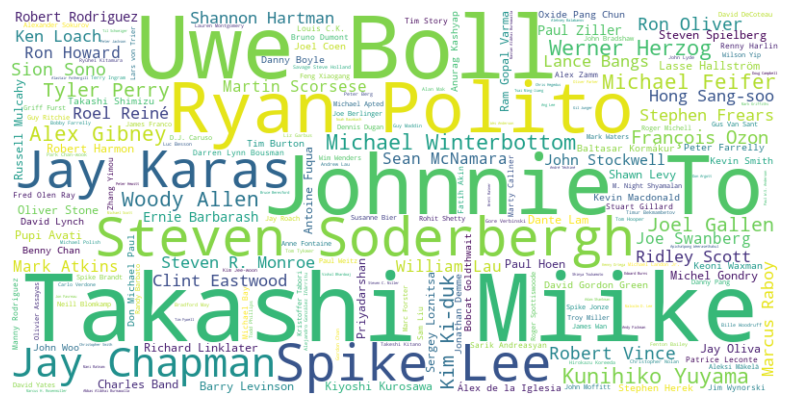

In [68]:
directors = []

for index, row in directors_analysis.iterrows():
    for name in row['directors']:
        directors.append(name)

# Count word frequencies
director_counts = pd.Series(directors).value_counts()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(director_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Bar Chart of Top 20th Directors

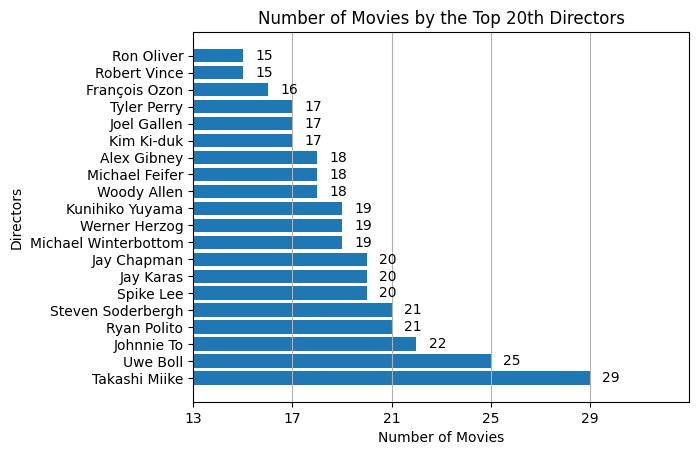

In [69]:
top_directors = director_counts[:20].copy()
x = top_directors.index
y = top_directors.values

# Create the bar chart
plt.barh(x, y)

# Customize the chart
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.title('Number of Movies by the Top 20th Directors')
plt.xlim(13, 33)
plt.grid(axis='x')
plt.xticks(range(13, 33, 4))

for i in range(len(x)):
    plt.text(y[i] + 0.5, i, str(y[i]), va='center')

# Display the chart
plt.show()

After getting the top 20th actors, the number of movies they acted by genre was studied.

In [70]:
genre_columns = []
for item in genre:
    genre_columns.append(item)
genre_columns = sorted(genre_columns)
actors_genre = pd.DataFrame(columns=["Actors"] + genre_columns)
actors_genre['Actors'] = top_actors.index
actors_genre.iloc[:,1:] = 0
actors_genre = actors_genre.set_index('Actors')
actors_genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Actors,,,,,,,,,,,,,,,,,,,,
James Franco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Samuel L. Jackson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Akshay Kumar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nicolas Cage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Robert De Niro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Morgan Freeman,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ewan McGregor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bruce Willis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Danny Trejo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
directors_genre = pd.DataFrame(columns=["Directors"] + genre_columns)
directors_genre['Directors'] = top_directors.index
directors_genre.iloc[:,1:] = 0
directors_genre = directors_genre.set_index('Directors')
directors_genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Directors,,,,,,,,,,,,,,,,,,,,
Takashi Miike,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Uwe Boll,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Johnnie To,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ryan Polito,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Steven Soderbergh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Spike Lee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jay Karas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jay Chapman,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Michael Winterbottom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
for index, row in actors_analysis.iterrows():
    for actor in row['actor_names']:
        if actor in actors_genre.index:
            for gen in row['genre_list']:
                actors_genre.loc[actor, gen] += 1
actors_genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Actors,,,,,,,,,,,,,,,,,,,,
James Franco,12,5,0,8,7,3,37,1,3,0,5,0,0,2,6,1,0,8,3,0
Samuel L. Jackson,24,17,4,7,19,3,23,3,4,0,1,3,1,9,2,6,0,25,1,1
Akshay Kumar,17,1,0,26,4,0,22,1,1,10,1,1,0,1,14,0,0,12,0,0
Nicolas Cage,21,7,4,8,14,0,19,4,8,0,3,3,0,4,2,4,0,26,2,0
Robert De Niro,10,1,1,18,10,3,16,1,0,0,1,2,0,4,6,2,1,11,0,0
Morgan Freeman,11,2,0,9,13,7,18,3,0,0,2,1,0,5,1,3,0,12,0,0
Ewan McGregor,10,9,3,7,4,2,18,5,2,0,2,0,2,3,8,5,0,13,3,1
Bruce Willis,19,2,2,16,16,0,14,3,1,0,0,0,2,4,2,3,0,22,3,0
Danny Trejo,25,2,1,9,8,2,7,0,4,0,0,12,0,2,0,5,0,15,0,2


In [73]:
for index, row in directors_analysis.iterrows():
    for director in row['directors']:
        if director in directors_genre.index:
            for gen in row['genre_list']:
                directors_genre.loc[director, gen] += 1
directors_genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Directors,,,,,,,,,,,,,,,,,,,,
Takashi Miike,17,2,0,9,6,0,10,1,3,6,1,10,0,1,0,3,0,12,0,1
Uwe Boll,19,5,0,2,4,1,10,0,6,1,1,8,0,1,0,1,0,11,1,1
Johnnie To,12,0,0,6,10,0,11,0,2,3,0,1,1,0,3,1,0,10,0,0
Ryan Polito,0,0,0,21,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Steven Soderbergh,1,0,0,4,9,1,16,0,0,0,2,0,0,4,5,2,0,8,3,0
Spike Lee,1,0,0,7,2,6,10,0,0,0,0,0,2,1,1,0,2,3,1,0
Jay Karas,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
Jay Chapman,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Michael Winterbottom,0,0,0,6,1,3,17,0,0,1,0,0,1,1,4,1,0,4,0,1


## Heatmap of Top 20th Actors by genre they acted

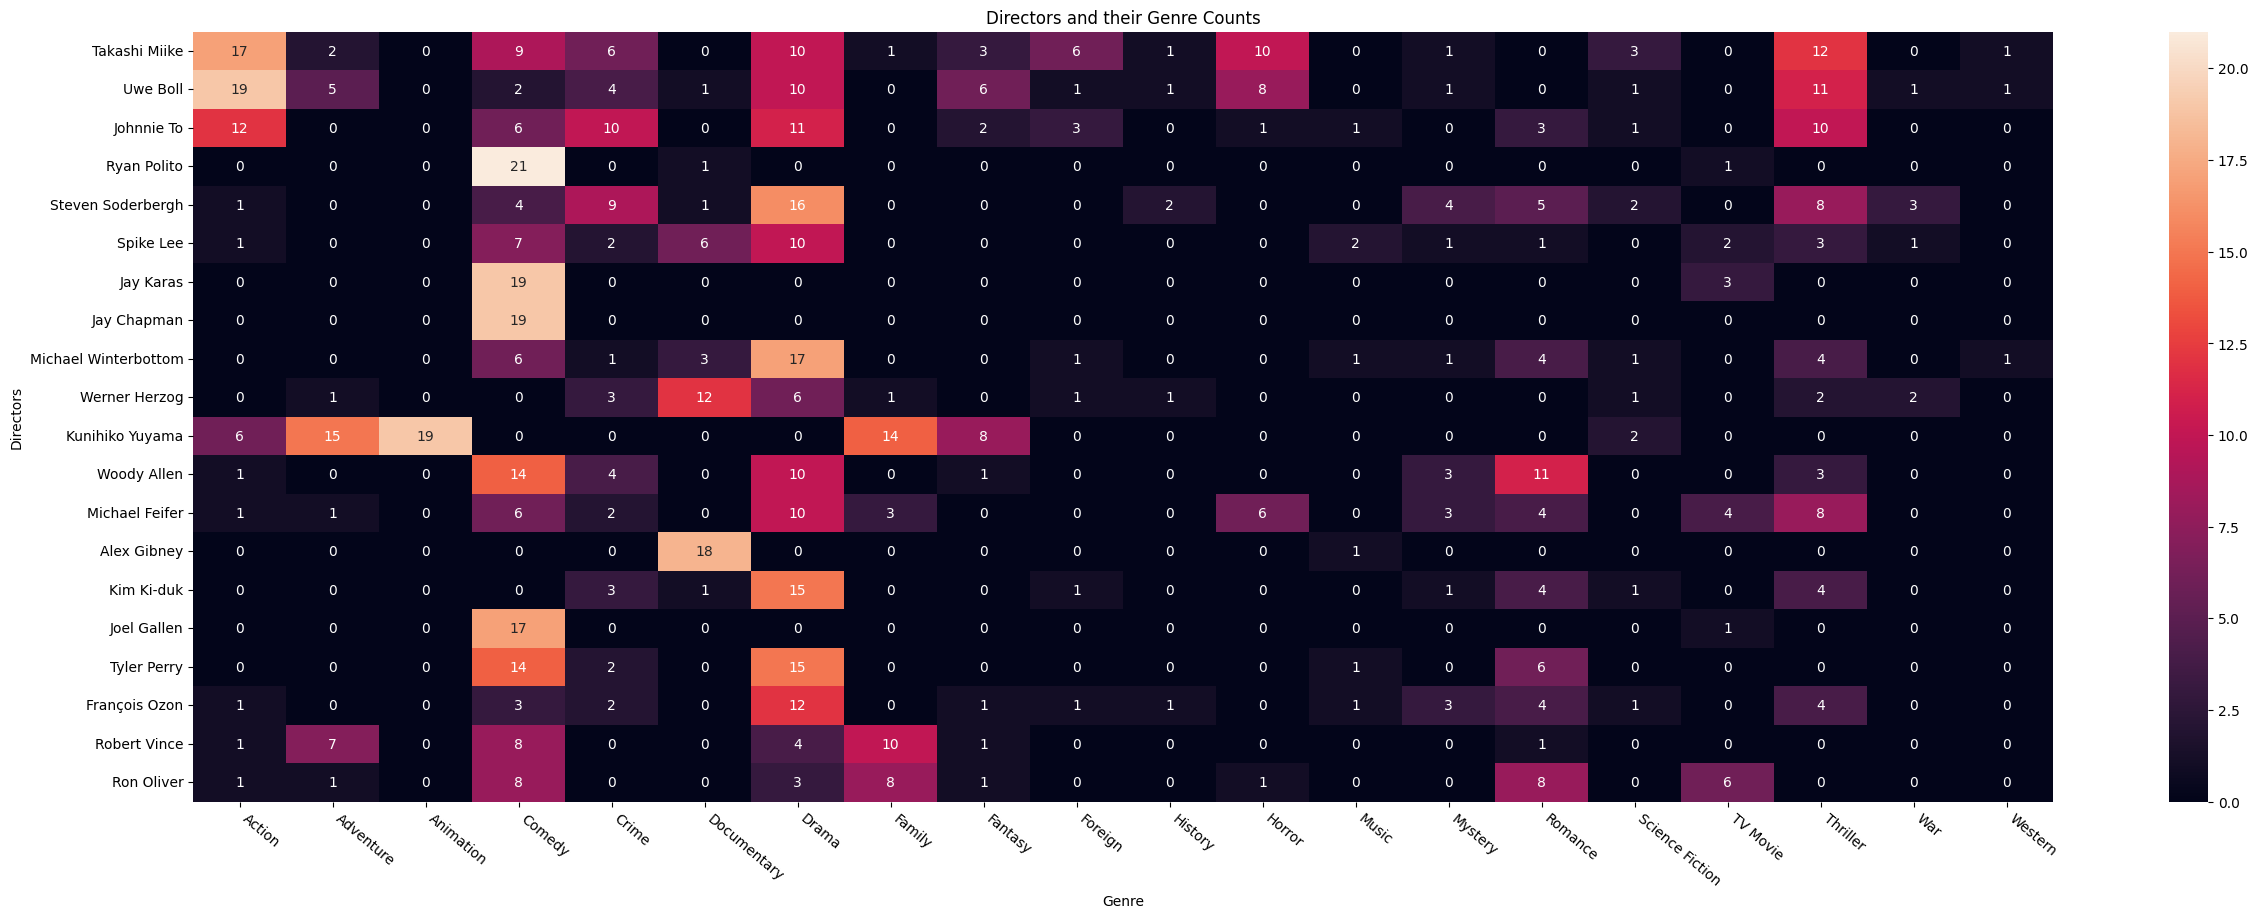

In [74]:
# Convert all columns except 'Actors' to numeric
numeric_columns = directors_genre.columns
directors_genre[numeric_columns] = directors_genre[numeric_columns].apply(pd.to_numeric)

# Create the heatmap
plt.figure(figsize=(30,10))
sns.heatmap(directors_genre, annot=True)
plt.title('Directors and their Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Directors')
plt.xticks(rotation=-40, ha='left')
# Display the heatmap
plt.show()

Findings: Majority of the top 20th actors mainly acted in 'Action', 'Drama', and 'Thriller' movies.

## Heatmap of Top 20th Directors by genre they directed

In [ ]:
# Convert all columns except 'Actors' to numeric
numeric_columns = actors_genre.columns
actors_genre[numeric_columns] = actors_genre[numeric_columns].apply(pd.to_numeric)

# Create the heatmap
plt.figure(figsize=(30,10))
sns.heatmap(actors_genre, annot=True)
plt.title('Actors and their Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Actors')
plt.xticks(rotation=-40, ha='left')
# Display the heatmap
plt.show()

Next, the performance of actors was studied in terms of the 'budget','popularity','revenue', and 'bayesian_average'.

In [329]:
dropped_analysis = filtered_analysis.copy()
dropped_analysis

,budget,popularity,revenue,bayesian_average,release_date,genre_list_lengths,actor_names_lengths,genre_list,actor_names
0,0,0.003949,0.0,5.626,2002-03-20,2,2,"[Drama, Foreign]","[Francesco Sframeli, Spiro Scimone]"
1,0,0.147130,0.0,5.691,2010-05-25,2,3,"[Drama, Romance]","[Marcin Walewski, Magdalena Cielecka, Mariusz ..."
2,0,0.135596,0.0,5.647,2013-10-12,2,3,"[Comedy, Horror]","[Josh Feldman, Gus Kamp, Carolyn Jania]"
3,0,0.211754,0.0,5.665,2012-06-20,1,3,[Drama],"[James Cartwright, Geraldine James, Alex Kelly]"
4,0,0.501046,0.0,5.702,2012-03-22,1,3,[Documentary],"[Jeff Bridges, Tom Colicchio, Mariana Chilton]"
...,...,...,...,...,...,...,...,...,...
22108,0,0.139936,0.0,5.598,2015-01-11,2,3,"[Comedy, Drama]","[Markie Adams, Roberto Aguire, Tina Arning]"
22109,0,0.076061,0.0,5.651,2000-10-22,2,3,"[Mystery, Horror]","[Tony Abatemarco, Andre Brooks, Mariclare Cost..."
22110,0,0.386450,0.0,5.639,2000-10-03,1,3,[Horror],"[Monty Bane, Lucy Butler, David Grammer]"
22111,0,0.178241,0.0,5.715,2011-11-17,1,3,[Drama],"[Angel Aquino, Perry Dizon, Hazel Orencio]"


In [330]:
def mode_percentage(column):
    mode_value = column.mode().iloc[0]
    mode_count = (column == mode_value).sum()
    total_count = column.count()  
    return mode_value, (mode_count / total_count) * 100


mode_info = {col: mode_percentage(dropped_analysis[col]) for col in dropped_analysis.columns[0:4]}

for column, (value, percentage) in mode_info.items():
    print(f"{column}: Mode = {value}, Percentage = {percentage:.2f}%")


budget: Mode = 0, Percentage = 73.90%
popularity: Mode = 0.002353, Percentage = 0.02%
revenue: Mode = 0.0, Percentage = 79.64%
bayesian_average: Mode = 5.626, Percentage = 3.63%


Since there are 79.64% of data have no revenue data, these zero values would affect the interpretation of the following visualisations.
<br>Therefore, the rows that contains zero values were dropped. 

In [331]:
dropped_analysis = dropped_analysis[dropped_analysis['revenue'] > 0]
dropped_analysis = dropped_analysis[dropped_analysis['budget'] > 0]
dropped_analysis = dropped_analysis.reset_index(drop=True)
dropped_analysis

,budget,popularity,revenue,bayesian_average,release_date,genre_list_lengths,actor_names_lengths,genre_list,actor_names
0,11000000,10.065450,59827328.0,6.121,2000-01-12,1,3,[Comedy],"[Ice Cube, Mike Epps, Justin Pierce]"
1,90000000,5.496624,14828081.0,5.267,2000-01-14,3,3,"[Horror, Science Fiction, Thriller]","[James Spader, Angela Bassett, Robert Forster]"
2,36000000,0.907927,3003296.0,5.511,2000-01-28,2,3,"[Drama, Comedy]","[Bette Midler, Nathan Lane, Stockard Channing]"
3,40000000,9.738371,161834276.0,5.690,2000-02-03,2,3,"[Horror, Mystery]","[David Arquette, Neve Campbell, Courteney Cox]"
4,10000000,6.370105,1631839.0,5.586,2000-02-04,4,3,"[Action, Comedy, Romance, Thriller]","[Sandra Bullock, Liam Neeson, Oliver Platt]"
...,...,...,...,...,...,...,...,...,...
3408,12000000,1.323587,19000000.0,5.860,2007-06-14,3,3,"[Action, Comedy, Drama]","[Rajinikanth, Suman, Shriya Saran]"
3409,750000,0.201582,3.0,5.639,2014-06-05,2,3,"[Crime, Comedy]","[Andrey Muravyov, Yuliya Khlynina, Anton Shurt..."
3410,800000,0.903061,1328612.0,5.635,2006-11-23,2,3,"[Comedy, Drama]","[Marat Basharov, Yuriy Kutsenko, Vladislav Gal..."
3411,2000000,0.121844,1268793.0,5.584,2010-09-30,2,3,"[Romance, Drama]","[Fyodor Bondarchuk, Oksana Fandera, Juozas Bud..."


In [332]:
for column in dropped_analysis.columns[:7]:
    min = dropped_analysis[column].min()
    max = dropped_analysis[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- budget -----
Range of values in 'budget': 1  -  380000000


----- popularity -----
Range of values in 'popularity': 0.038876  -  547.488298


----- revenue -----
Range of values in 'revenue': 1.0  -  2787965087.0


----- bayesian_average -----
Range of values in 'bayesian_average': 3.789  -  8.276


----- release_date -----
Range of values in 'release_date': 2000-01-12 00:00:00  -  2017-08-04 00:00:00


----- genre_list_lengths -----
Range of values in 'genre_list_lengths': 0  -  7


----- actor_names_lengths -----
Range of values in 'actor_names_lengths': 1  -  3




In the columns 'budget' and 'revenue', there are data with value less than 100. When the budget and revenue were cross-checked in the internet, these data was found out to be a wrong input.
<br>Thus, by applying the distribution of variance, the bottom 2.2% of data were dropped.

In [333]:
drop_percent = 0.022
revenue_cutoff = dropped_analysis['revenue'].quantile(drop_percent)
dropped_analysis = dropped_analysis[dropped_analysis['revenue'] > revenue_cutoff]
budget_cutoff = dropped_analysis['budget'].quantile(drop_percent)
dropped_analysis = dropped_analysis[dropped_analysis['budget'] > budget_cutoff]
dropped_analysis = dropped_analysis.reset_index(drop=True)
dropped_analysis

,budget,popularity,revenue,bayesian_average,release_date,genre_list_lengths,actor_names_lengths,genre_list,actor_names
0,11000000,10.065450,59827328.0,6.121,2000-01-12,1,3,[Comedy],"[Ice Cube, Mike Epps, Justin Pierce]"
1,90000000,5.496624,14828081.0,5.267,2000-01-14,3,3,"[Horror, Science Fiction, Thriller]","[James Spader, Angela Bassett, Robert Forster]"
2,36000000,0.907927,3003296.0,5.511,2000-01-28,2,3,"[Drama, Comedy]","[Bette Midler, Nathan Lane, Stockard Channing]"
3,40000000,9.738371,161834276.0,5.690,2000-02-03,2,3,"[Horror, Mystery]","[David Arquette, Neve Campbell, Courteney Cox]"
4,10000000,6.370105,1631839.0,5.586,2000-02-04,4,3,"[Action, Comedy, Romance, Thriller]","[Sandra Bullock, Liam Neeson, Oliver Platt]"
...,...,...,...,...,...,...,...,...,...
3258,11000000,40.796775,184770205.0,6.725,2017-08-03,4,3,"[Action, Crime, Mystery, Thriller]","[Jeremy Renner, Elizabeth Olsen, Gil Birmingham]"
3259,12000000,1.323587,19000000.0,5.860,2007-06-14,3,3,"[Action, Comedy, Drama]","[Rajinikanth, Suman, Shriya Saran]"
3260,800000,0.903061,1328612.0,5.635,2006-11-23,2,3,"[Comedy, Drama]","[Marat Basharov, Yuriy Kutsenko, Vladislav Gal..."
3261,2000000,0.121844,1268793.0,5.584,2010-09-30,2,3,"[Romance, Drama]","[Fyodor Bondarchuk, Oksana Fandera, Juozas Bud..."


In [334]:
for column in dropped_analysis.columns[:7]:
    min = dropped_analysis[column].min()
    max = dropped_analysis[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- budget -----
Range of values in 'budget': 380000  -  380000000


----- popularity -----
Range of values in 'popularity': 0.039793  -  547.488298


----- revenue -----
Range of values in 'revenue': 21256.0  -  2787965087.0


----- bayesian_average -----
Range of values in 'bayesian_average': 3.789  -  8.276


----- release_date -----
Range of values in 'release_date': 2000-01-12 00:00:00  -  2017-08-04 00:00:00


----- genre_list_lengths -----
Range of values in 'genre_list_lengths': 0  -  7


----- actor_names_lengths -----
Range of values in 'actor_names_lengths': 1  -  3




In [335]:
actors = set()

for index, row in dropped_analysis.iterrows():
    for name in row['actor_names']:
        actors.add(name)

actors_list = []
for item in actors:
    actors_list.append(item)

In [336]:
column = ['Actors', 'Budget', 'Revenue', 'Popularity', 'Bayesian_average', 'No of Movies']
score = pd.DataFrame(columns = column)
score['Actors'] = actors_list
score.iloc[:,1:] = 0
score = score.set_index('Actors')
score

,Budget,Revenue,Popularity,Bayesian_average,No of Movies
Actors,,,,,
Lucien Laviscount,0,0,0,0,0
Udo Kier,0,0,0,0,0
Scott Caan,0,0,0,0,0
Stanley Tucci,0,0,0,0,0
Rodrigo Santoro,0,0,0,0,0
...,...,...,...,...,...
J. J. Feild,0,0,0,0,0
Valeriy Zolotukhin,0,0,0,0,0
Margarete Tiesel,0,0,0,0,0


In [337]:
for index, row in dropped_analysis.iterrows():
    for name in row['actor_names']:
        score.loc[name, 'Budget'] += row['budget']
        score.loc[name, 'Revenue'] += row['revenue']
        score.loc[name, 'Popularity'] += row['popularity']
        score.loc[name, 'Bayesian_average'] += row['bayesian_average']
        score.loc[name, 'No of Movies'] += 1
score

,Budget,Revenue,Popularity,Bayesian_average,No of Movies
Actors,,,,,
Lucien Laviscount,7400000,26667197.0,19.225832,5.257,1
Udo Kier,8000000,8279017.0,12.691457,6.184,1
Scott Caan,109000000,70485762.0,24.570465,16.753,3
Stanley Tucci,310000000,1440362851.0,40.730061,19.258,3
Rodrigo Santoro,190100000,279332242.0,39.67627,23.247,4
...,...,...,...,...,...
J. J. Feild,14900000,2184841.0,8.600737,11.963,2
Valeriy Zolotukhin,15000000,21500000.0,3.931527,5.552,1
Margarete Tiesel,3600000,24267.0,4.645724,5.973,1


To filter out the one hit wonders, actors with less than 10 movies were filtered out.

In [380]:
score = score[score['No of Movies'] >= 10]
score

,Budget,Revenue,Popularity,Bayesian_average,No of Movies
Actors,,,,,
Ben Kingsley,936500000,2159490905.0,187.1301,99.819,16
Ben Affleck,1313500000,3312823160.0,394.371986,126.815,21
Nicole Kidman,1080800000,1824061723.0,223.582176,122.377,20
Rachel McAdams,704000000,2521850806.0,215.357999,109.474,16
Hugh Jackman,2047000000,5089983053.0,238.520757,132.385,20
...,...,...,...,...,...
Vin Diesel,1460000000,6028993783.0,205.585157,106.089,17
Russell Crowe,1465500000,3389805072.0,243.332628,123.927,19
Sean Penn,382000000,647855652.0,115.276347,75.614,12


In [381]:
for column in score.columns:
    min = score[column].min()
    max = score[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- Budget -----
Range of values in 'Budget': 32100000  -  3075000000


----- Revenue -----
Range of values in 'Revenue': 87000000.0  -  9460433002.0


----- Popularity -----
Range of values in 'Popularity': 7.275411000000001  -  694.5834550000001


----- Bayesian_average -----
Range of values in 'Bayesian_average': 56.557  -  193.32500000000007


----- No of Movies -----
Range of values in 'No of Movies': 10  -  30




In [382]:
avg_score = score.copy()
avg_score['Return rate'] = 0.0
for index, row in score.iterrows():
    if row['No of Movies'] > 1:
        avg_score.loc[index, 'Budget'] = row['Budget'] / row['No of Movies']
        avg_score.loc[index, 'Revenue'] = row['Revenue'] / row['No of Movies']
        avg_score.loc[index, 'Popularity'] = row['Popularity'] / row['No of Movies']
        avg_score.loc[index, 'Bayesian_average'] = row['Bayesian_average'] / row['No of Movies']
    avg_score.loc[index, 'Return rate'] = (row['Revenue'] - row['Budget']) / row['Budget']

avg_score = avg_score[['Budget', 'Revenue', 'Return rate', 'Popularity', 'Bayesian_average']].copy()
avg_score

,Budget,Revenue,Return rate,Popularity,Bayesian_average
Actors,,,,,
Ben Kingsley,58531250.0,134968181.5625,1.305917,11.695631,6.238688
Ben Affleck,62547619.047619,157753483.809524,1.522134,18.779618,6.03881
Nicole Kidman,54040000.0,91203086.15,0.687696,11.179109,6.11885
Rachel McAdams,44000000.0,157615675.375,2.582174,13.459875,6.842125
Hugh Jackman,102350000.0,254499152.65,1.486557,11.926038,6.61925
...,...,...,...,...,...
Vin Diesel,85882352.941176,354646693.117647,3.129448,12.093245,6.240529
Russell Crowe,77131578.947368,178410793.263158,1.313071,12.80698,6.522474
Sean Penn,31833333.333333,53987971.0,0.695957,9.606362,6.301167


In [383]:
for column in avg_score.columns:
    min = avg_score[column].min()
    max = avg_score[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- Budget -----
Range of values in 'Budget': 3210000.0  -  153181818.1818182


----- Revenue -----
Range of values in 'Revenue': 8700000.0  -  771086086.8


----- Return rate -----
Range of values in 'Return rate': -0.15764188331627432  -  8.457980568774799


----- Popularity -----
Range of values in 'Popularity': 0.7275411  -  46.30556366666667


----- Bayesian_average -----
Range of values in 'Bayesian_average': 5.559461538461539  -  7.203799999999999




# Top 18th Actor in terms of Popularity and Bayesian_average

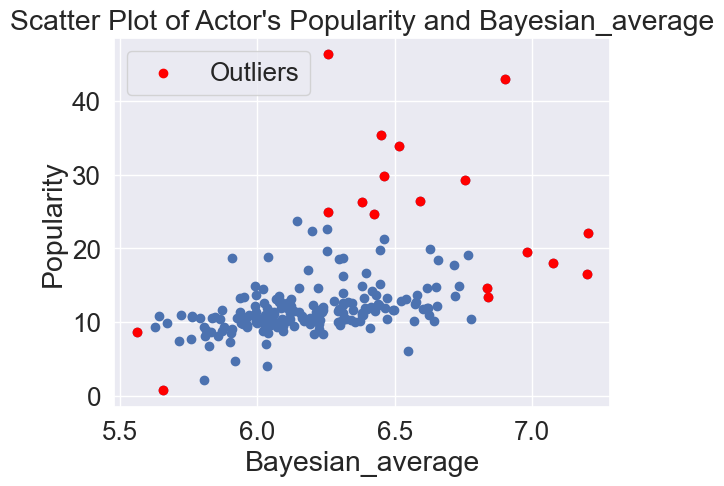

In [387]:
graph_data = avg_score

x = graph_data['Bayesian_average']
y = graph_data['Popularity']

# Convert x and y to numeric arrays
x = pd.to_numeric(x)
y = pd.to_numeric(y)

# Calculate z-scores for x and y
z_scores_x = np.abs(stats.zscore(x))
z_scores_y = np.abs(stats.zscore(y))

# Set a threshold for considering a point as an outlier (e.g., z-score > 2)
threshold = 2

# Find the indices of the outliers
outlier_indices = np.where((z_scores_x > threshold) | (z_scores_y > threshold))[0]

# Create the scatter plot
plt.scatter(x, y)

# Highlight the outliers
plt.scatter(
    [x.iloc[i,] for i in outlier_indices],
    [y.iloc[i,] for i in outlier_indices],
    color='red',
    label='Outliers'
)

# Add labels and title
plt.xlabel('Bayesian_average')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Actor\'s Popularity and Bayesian_average')

# Display the plot
plt.legend()
plt.show()

In [388]:
outliers = graph_data.iloc[outlier_indices]
outliers = outliers.sort_values(by='Popularity', ascending=False)
outliers

,Budget,Revenue,Return rate,Popularity,Bayesian_average
Actors,,,,,
Sandra Bullock,40366666.666667,228121651.933333,4.651238,46.305564,6.255667
Emma Watson,112333333.333333,630695533.466667,4.614500,42.923914,6.902533
Zoe Saldana,70180000.0,357201159.533333,4.089786,35.333512,6.449733
Chris Pine,91153846.153846,218745570.153846,1.399740,33.894521,6.517692
Kevin Spacey,48636363.636364,83844092.545455,0.723897,29.780889,6.462
Robert Downey Jr.,119300000.0,507574613.6875,3.254607,29.327298,6.757563
Jennifer Lawrence,87408333.333333,375902326.666667,3.300532,26.463589,6.592167
Chris Evans,80262500.0,307350329.4375,2.829314,26.248084,6.381062
Josh Hutcherson,80083333.333333,329052286.166667,3.108874,24.918347,6.257


# Top 13th Actor in terms of Bayesian_average and Return rate

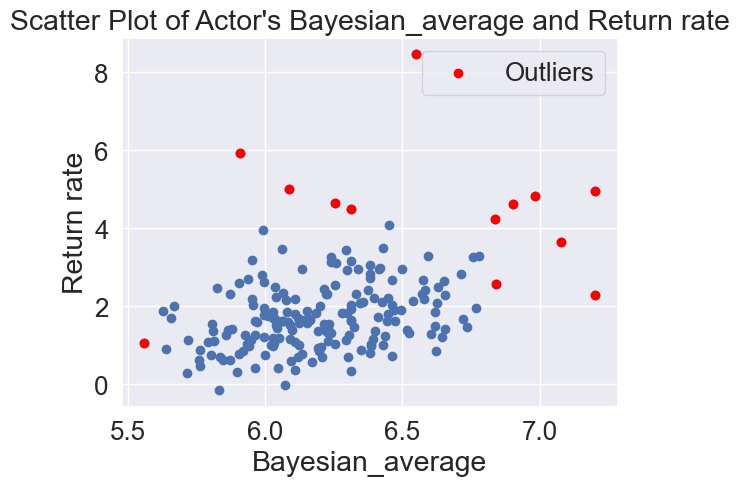

In [390]:
graph_data = avg_score

x = graph_data['Bayesian_average']
y = graph_data['Return rate']

# Convert x and y to numeric arrays
x = pd.to_numeric(x)
y = pd.to_numeric(y)

# Calculate z-scores for x and y
z_scores_x = np.abs(stats.zscore(x))
z_scores_y = np.abs(stats.zscore(y))

# Set a threshold for considering a point as an outlier (e.g., z-score > 2)
threshold = 2

# Find the indices of the outliers
outlier_indices = np.where((z_scores_x > threshold) | (z_scores_y > threshold))[0]

# Create the scatter plot
plt.scatter(x, y)

# Highlight the outliers
plt.scatter(
    [x.iloc[i,] for i in outlier_indices],
    [y.iloc[i,] for i in outlier_indices],
    color='red',
    label='Outliers'
)

# Add labels and title
plt.xlabel('Bayesian_average')
plt.ylabel('Return rate')
plt.title('Scatter Plot of Actor\'s Bayesian_average and Return rate')

# Display the plot
plt.legend()
plt.show()

In [391]:
outliers = graph_data.iloc[outlier_indices]
outliers = outliers.sort_values(by='Return rate', ascending=False)
outliers

,Budget,Revenue,Return rate,Popularity,Bayesian_average
Actors,,,,,
Aamir Khan,7837900.0,74130705.9,8.457981,6.135323,6.5486
Robert Pattinson,46431818.181818,321593908.0,5.926154,18.69288,5.908727
John Leguizamo,50038461.538462,300015540.153846,4.995699,11.964309,6.086769
Rupert Grint,129300000.0,771086086.8,4.963543,22.045581,7.2038
Daniel Radcliffe,104230769.230769,606263799.0,4.816553,19.467376,6.981923
Sandra Bullock,40366666.666667,228121651.933333,4.651238,46.305564,6.255667
Emma Watson,112333333.333333,630695533.466667,4.614500,42.923914,6.902533
Kristen Wiig,58038461.538462,318519131.0,4.488070,16.219197,6.311923
Viggo Mortensen,45250000.0,237364344.2,4.245621,14.667771,6.8371
